In [440]:
#Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [441]:
#Cargar archivos con pandas
fpkm=pd.read_csv("/home/bguzman/jupyter/UI/YMC/data/KuangRNAseq_fpkm", sep="\t",index_col=0)
atac=pd.read_csv("/home/bguzman/jupyter/UI/YMC/data/GSE101290_normalized_atac_counts.csv",index_col=0)
OX= pd.read_csv("/home/bguzman/jupyter/UI/YMC/data/kuangOX.txt", sep="\t")
RB= pd.read_csv("/home/bguzman/jupyter/UI/YMC/data/kuangRB.txt", sep="\t")
RC= pd.read_csv("/home/bguzman/jupyter/UI/YMC/data/kuangRC.txt", sep="\t")
SAM=pd.read_csv("/home/bguzman/jupyter/UI/YMC/data/vectorME.csv",index_col=0)
ACOA=pd.read_csv("/home/bguzman/jupyter/UI/YMC/data/vectorAC.csv",index_col=0)
SAM_glc=pd.read_csv("/home/bguzman/jupyter/UI/YMC/data/vectorME_glc.csv",index_col=0)
ACOA_glc=pd.read_csv("/home/bguzman/jupyter/UI/YMC/data/vectorAC_glc.csv",index_col=0)
SAM_all=pd.read_csv("/home/bguzman/jupyter/UI/YMC/data/vectorME_allflux.csv",index_col=0)
ACOA_all=pd.read_csv("/home/bguzman/jupyter/UI/YMC/data/vectorAC_allflux.csv",index_col=0)
H3K9ac=pd.read_csv("/home/bguzman/jupyter/UI/YMC/analysis/dfi_T_all_ac.csv", index_col=0)
H3K4me3=pd.read_csv("/home/bguzman/jupyter/UI/YMC/analysis/dfi_T_all.csv", index_col=0)

In [406]:
#Separar las listas de cada etapa
#Dejar solo las columnas de RNA-seq y excluir las de microarrays
df_fpkm=fpkm.iloc[0:-2,-16::] 


In [407]:
#Sacar promedio entre los diferentes elementos de los replicados 1, 2; 3, 4; 5 , 6.
genes=atac.index
T1=list((atac.iloc[: , 1].values+atac.iloc[: , 2].values)/2)
T2=list((atac.iloc[: , 3].values+atac.iloc[: , 4].values)/2)
T3=list((atac.iloc[: , 5].values+atac.iloc[: , 6].values)/2)
T4=list((atac.iloc[: , 7].values+atac.iloc[: , 8].values)/2)
T5=list((atac.iloc[: , 9].values+atac.iloc[: , 10].values)/2)
T6=list((atac.iloc[: , 11].values+atac.iloc[: , 12].values)/2)


In [408]:
#Hacer df apartir de las listas realizadas con los promedios de los replicados
import pandas as pd
import numpy as np
lst1 = genes
lst2 = T1
lst3= T2
lst4= T3
lst5= T4
lst6= T5
lst7= T6
atac_prom = pd.DataFrame(list(zip(lst1,lst2,lst3,lst4,lst5,lst6,lst7)), columns = ['Genes','T1','T2','T3','T4','T5','T6'])
#fijar como indice la columna de los gene.id para hacer el heatmap
df_atac = atac_prom.set_index(['Genes'])
#df_atac

In [409]:
#Definir listas con los genes por etapa 
lista_RC=list(RC.iloc[0:-2,0])
lista_OX=list(OX.iloc[0:-2,0])
lista_RB=list(RB.iloc[0:-2,0])

In [410]:
#Listas de etapas en atac-seq
list_1=lista_RC
list_2=atac.index
from collections import Counter
cnt1 = Counter(list_1)
cnt2 = Counter(list_2)
lista_RB_ss= [key for key, counts in cnt2.items() if cnt1[key] == counts]

list_3=lista_OX
list_4=atac.index
from collections import Counter
cnt3 = Counter(list_3)
cnt4 = Counter(list_4)
lista_OX_ss= [key for key, counts in cnt4.items() if cnt3[key] == counts]

list_5=lista_RB
list_6=atac.index
from collections import Counter
cnt5 = Counter(list_5)
cnt6 = Counter(list_6)
lista_RB_ss= [key for key, counts in cnt6.items() if cnt5[key] == counts]


In [411]:
lista_RC_ss=[]
for gene in lista_RC:
    if gene in atac.index:
          lista_RC_ss.append(gene)

lista_OX_ss=[]
for gene in lista_OX:
    if gene in atac.index:
          lista_OX_ss.append(gene)
            
lista_RB_ss=[]
for gene in lista_RB:
    if gene in atac.index:
          lista_RB_ss.append(gene)

LISTA ORDENADA DE GENES PARA H3K9AC

In [439]:
#Input
marcaEpigenetica= H3K9ac
genesEtapa= lista_RC_ss
perfilPrecursor= ACOA
    
#Cálculo de la correlacion entre el precursor y la marca
def coeficiente_correlacion(marcaEpigenetica,perfilPrecursor):

  #Calcula el coeficiente de correlación dados 
  #dos vectores a y b.

  #Esta función recibe "a" y "b" como listas

  #Crea los array a y b a partir de las listas
  #Esto, con el fin de hacer operaciones entre vectores
    array_a = np.array(marcaEpigenetica)
    array_b = np.array(perfilPrecursor)

  #calcula los promedios de los vectores a y b
    promedio_a = np.mean(marcaEpigenetica)
    promedio_b = np.mean(perfilPrecursor)

  #Calcula las distancias de cada dato puntual respecto a su media
    distancia_a = marcaEpigenetica-promedio_a*np.array([1]*len(marcaEpigenetica))
    distancia_b = perfilPrecursor-promedio_b*np.array([1]*len(perfilPrecursor))

  #Calcula el producto punto entre estas dos distancias
  #Que viene siendo el numerador de la ecuación de coeficientes de correlacion
    numerador = np.dot(distancia_a,distancia_b)

  #Calcula la norma de â y b̂
  #Construcción del denominador
    norma_a = np.linalg.norm(distancia_a)
    norma_b = np.linalg.norm(distancia_b)
    denominador = norma_a*norma_b

  #Calculo del coeficiente de correlación
    coef_corr = numerador/denominador
    return coef_corr

#Agregar vectores
    corr=[]
    for i in range(len(marcaEpigenetica)):
        corr.append(coeficiente_correlacion(np.array(marcaEpigenetica)[i],np.array(perfilPrecursor)[0]))
#ordenar corrlacion demayor a menor
    df_corr=pd.DataFrame(corr,index =marcaEpigenetica.index,columns = ['correlation'])
    corr_sort = df_corr.sort_values('correlation',ascending=False)

print(corr_sort)

#Asociar estos genes con los de la lista RC,RB,OX
genesEtapa_=[] 
for i in corr_sort.index:
    genesEtapa_.append(i) #Genes ordenados de mayor a menor correlacion

genesEtapa_ordenados=[]       
for gene in genesEtapa_:
        if gene in genesEtapa: #vector de Kuang con genes en OX, RB, o RC relacionado con atacseq
            genesEtapa_ordenados.append(gene)

corr
#len(genesEtapa_ordenados)
#genesEtapa_ordenados

           correlation
gene_id               
YGR052W       0.911903
YMR252C       0.906509
YGR051C       0.889359
YMR181C       0.884910
YHR137W       0.881803
...                ...
YAL067C            NaN
YCR105W            NaN
YHL047C            NaN
YHL046W-A          NaN
YNR071C            NaN

[7130 rows x 1 columns]


[-0.00855728724243674,
 -0.07517003857823797,
 -0.14649773220590975,
 -0.7165750052324985,
 0.3850353464405515,
 0.3587924127946322,
 0.5012602399992723,
 0.5209221991348552,
 nan,
 -0.19384188806006847,
 0.22612696135687124,
 0.22612696135687124,
 0.3808610734731755,
 0.5359905596415726,
 0.04740481201655576,
 0.5399467630600736,
 0.5835360002054545,
 0.5669601933473863,
 0.08642221561400228,
 -0.18144270775725477,
 -0.1392196029232525,
 -0.4193070173902023,
 0.2940628167679102,
 0.19188567650469018,
 0.7324375164921322,
 0.7788278189817105,
 0.024456146886307695,
 0.07902951018665763,
 0.7234661436427589,
 -0.2863729334018702,
 -0.19790369663663565,
 -0.6630417622812615,
 -0.48756544469122687,
 -0.46322447292478064,
 -0.4976009165314055,
 -0.48377773157014625,
 -0.4612481324903109,
 -0.15186598959551953,
 -0.3527207313883695,
 -0.768681288279804,
 -0.21084843288881544,
 0.3795171313812205,
 0.20649389722721215,
 0.754176637341626,
 0.39828313676227667,
 -0.24496822975497312,
 -0.2713

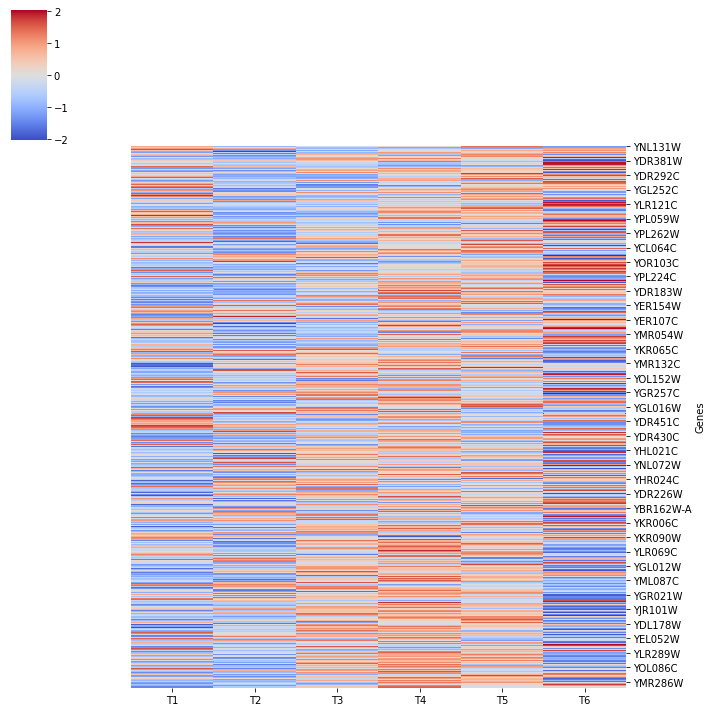

In [437]:
#Heatmap normalizado
RC_ACOA_atac=df_atac.loc[genesEtapa_ordenados].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
ax=sns.clustermap(RC_ACOA_atac, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, row_cluster=False
)


plt.savefig("RC_ACOA_atac.pdf")

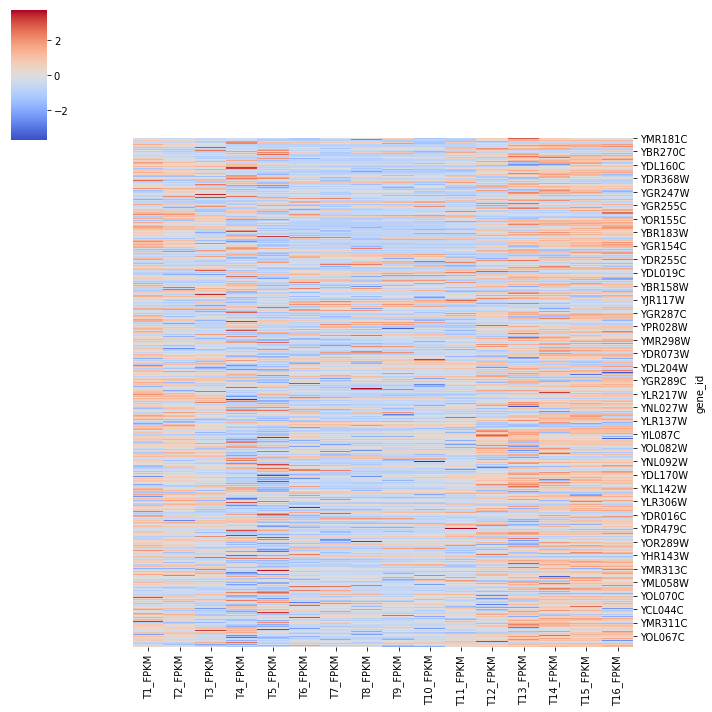

In [414]:
#Heatmap normalizado
RC_fpkm_ac=fpkm.loc[genesEtapa_ordenados].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
ax=sns.clustermap(RC_fpkm_ac, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, row_cluster=False
)


plt.savefig("RC_fpkm_ac.pdf")

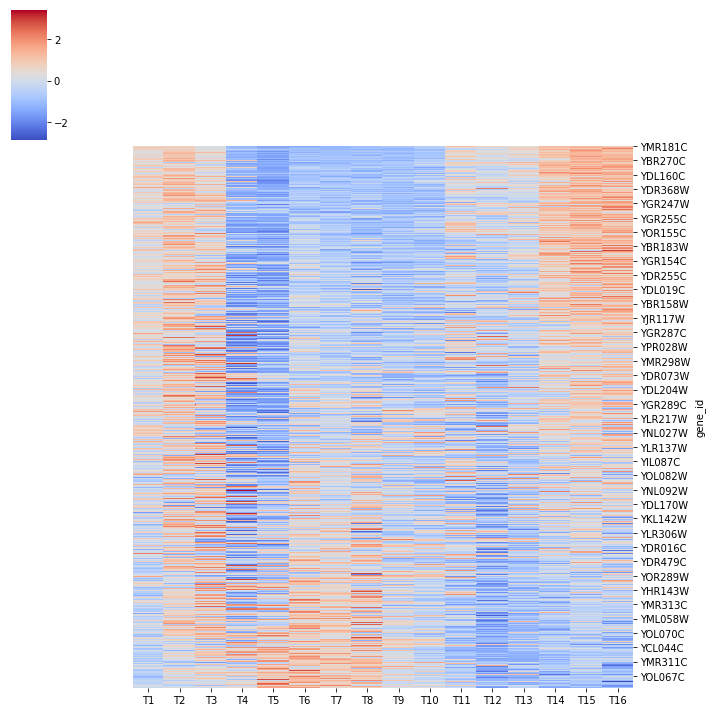

In [415]:
#Heatmap normalizado
RC_ACOA_H3K9ac=H3K9ac.loc[genesEtapa_ordenados].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
ax=sns.clustermap(RC_ACOA_H3K9ac, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, row_cluster=False
)


plt.savefig("RC_ACOA_H3K9ac.pdf")

In [416]:
#Input
marcaEpigenetica= H3K9ac
genesEtapa= lista_OX_ss
perfilPrecursor= ACOA

#Cálculo de la correlacion entre el precursor y la marca
def coeficiente_correlacion(marcaEpigenetica,perfilPrecursor):

  #Calcula el coeficiente de correlación dados 
  #dos vectores a y b.

  #Esta función recibe "a" y "b" como listas

  #Crea los array a y b a partir de las listas
  #Esto, con el fin de hacer operaciones entre vectores
    array_a = np.array(marcaEpigenetica)
    array_b = np.array(perfilPrecursor)

  #calcula los promedios de los vectores a y b
    promedio_a = np.mean(marcaEpigenetica)
    promedio_b = np.mean(perfilPrecursor)

  #Calcula las distancias de cada dato puntual respecto a su media
    distancia_a = marcaEpigenetica-promedio_a*np.array([1]*len(marcaEpigenetica))
    distancia_b = perfilPrecursor-promedio_b*np.array([1]*len(perfilPrecursor))

  #Calcula el producto punto entre estas dos distancias
  #Que viene siendo el numerador de la ecuación de coeficientes de correlacion
    numerador = np.dot(distancia_a,distancia_b)

  #Calcula la norma de â y b̂
  #Construcción del denominador
    norma_a = np.linalg.norm(distancia_a)
    norma_b = np.linalg.norm(distancia_b)
    denominador = norma_a*norma_b

  #Calculo del coeficiente de correlación
    coef_corr = numerador/denominador
    return coef_corr

#Agregar vectores
    corr=[]
    for i in range(len(marcaEpigenetica)):
        corr.append(coeficiente_correlacion(np.array(marcaEpigenetica)[i],np.array(perfilPrecursor)[0]))
#ordenar corrlacion demayor a menor
    df_corr=pd.DataFrame(corr,index =marcaEpigenetica.index,columns = ['correlation'])
    corr_sort = df_corr.sort_values('correlation',ascending=False)

#print(corr_sort)

#Asociar estos genes con los de la lista RC,RB,OX
genesEtapa_=[] 
for i in corr_sort.index:
    genesEtapa_.append(i) #Genes ordenados de mayor a menor correlacion

genesEtapa_ordenados=[]       
for gene in genesEtapa_:
        if gene in genesEtapa: #vector de Kuang con genes en OX, RB, o RC relacionado con atacseq
            genesEtapa_ordenados.append(gene)

len(genesEtapa_ordenados)
#genesEtapa_ordenados

1404

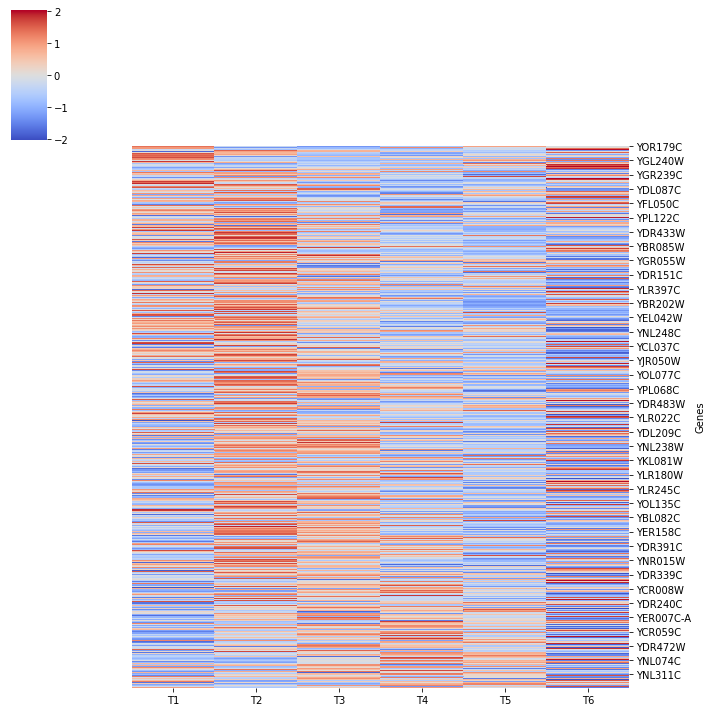

In [417]:
#Heatmap normalizado
OX_ACOA_norm=df_atac.loc[genesEtapa_ordenados].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
ax=sns.clustermap(OX_ACOA_norm, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, row_cluster=False
)


plt.savefig("OX_ACOA_atac.pdf")

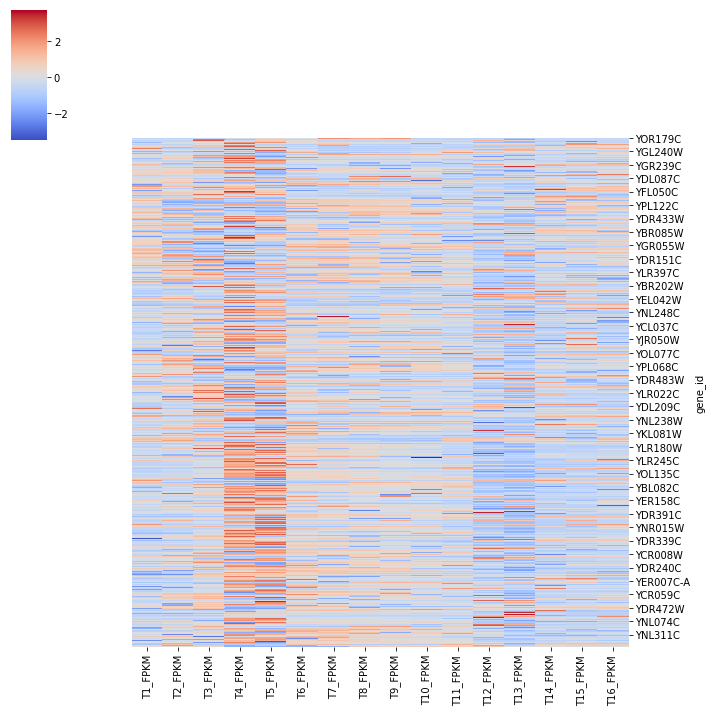

In [418]:
#Heatmap normalizado
OX_fpkm_ac=fpkm.loc[genesEtapa_ordenados].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
ax=sns.clustermap(OX_fpkm_ac, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, row_cluster=False
)


plt.savefig("OX_fpkm_ac.pdf")

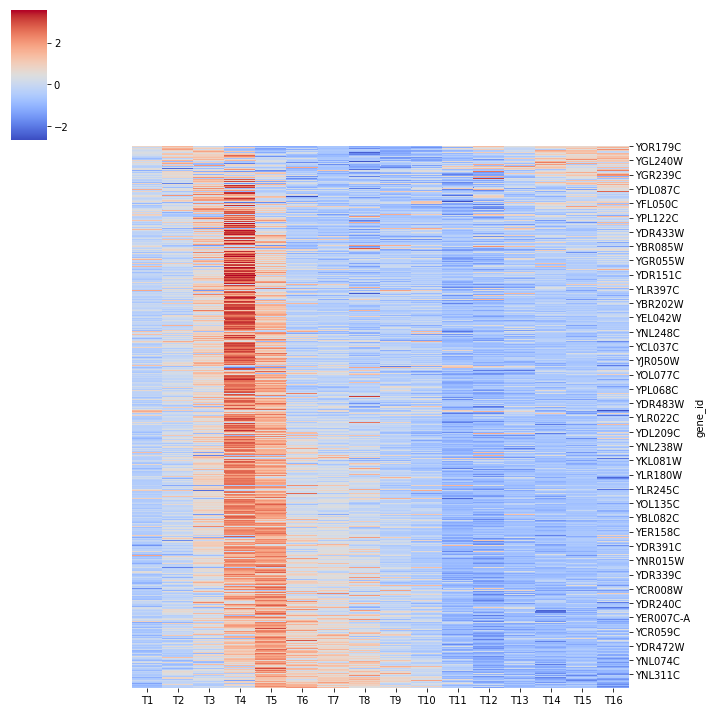

In [419]:
#Heatmap normalizado
OX_ACOA_H3K9ac=H3K9ac.loc[genesEtapa_ordenados].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
ax=sns.clustermap(OX_ACOA_H3K9ac, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, row_cluster=False
)


plt.savefig("OX_ACOA_H3K9ac.pdf")

In [420]:
#Input
marcaEpigenetica= H3K9ac
genesEtapa= lista_RB_ss
perfilPrecursor= ACOA

#Cálculo de la correlacion entre el precursor y la marca
def coeficiente_correlacion(marcaEpigenetica,perfilPrecursor):

  #Calcula el coeficiente de correlación dados 
  #dos vectores a y b.

  #Esta función recibe "a" y "b" como listas

  #Crea los array a y b a partir de las listas
  #Esto, con el fin de hacer operaciones entre vectores
    array_a = np.array(marcaEpigenetica)
    array_b = np.array(perfilPrecursor)

  #calcula los promedios de los vectores a y b
    promedio_a = np.mean(marcaEpigenetica)
    promedio_b = np.mean(perfilPrecursor)

  #Calcula las distancias de cada dato puntual respecto a su media
    distancia_a = marcaEpigenetica-promedio_a*np.array([1]*len(marcaEpigenetica))
    distancia_b = perfilPrecursor-promedio_b*np.array([1]*len(perfilPrecursor))

  #Calcula el producto punto entre estas dos distancias
  #Que viene siendo el numerador de la ecuación de coeficientes de correlacion
    numerador = np.dot(distancia_a,distancia_b)

  #Calcula la norma de â y b̂
  #Construcción del denominador
    norma_a = np.linalg.norm(distancia_a)
    norma_b = np.linalg.norm(distancia_b)
    denominador = norma_a*norma_b

  #Calculo del coeficiente de correlación
    coef_corr = numerador/denominador
    return coef_corr

#Agregar vectores
    corr=[]
    for i in range(len(marcaEpigenetica)):
        corr.append(coeficiente_correlacion(np.array(marcaEpigenetica)[i],np.array(perfilPrecursor)[0]))
#ordenar corrlacion demayor a menor
    df_corr=pd.DataFrame(corr,index =marcaEpigenetica.index,columns = ['correlation'])
    corr_sort = df_corr.sort_values('correlation',ascending=False)

#print(corr_sort)

#Asociar estos genes con los de la lista RC,RB,OX
genesEtapa_=[] 
for i in corr_sort.index:
    genesEtapa_.append(i) #Genes ordenados de mayor a menor correlacion

genesEtapa_ordenados=[]       
for gene in genesEtapa_:
        if gene in genesEtapa: #vector de Kuang con genes en OX, RB, o RC relacionado con atacseq
            genesEtapa_ordenados.append(gene)

len(genesEtapa_ordenados)
#genesEtapa_ordenados

861

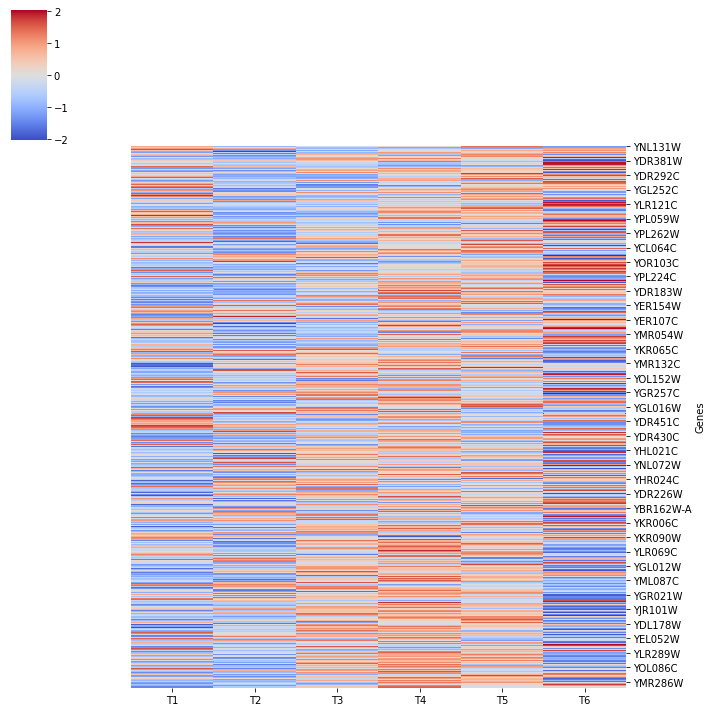

In [421]:
#Heatmap normalizado
RB_ACOA_norm=df_atac.loc[genesEtapa_ordenados].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
ax=sns.clustermap(RB_ACOA_norm, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, row_cluster=False
)


plt.savefig("RB_ACOA_atac.pdf")

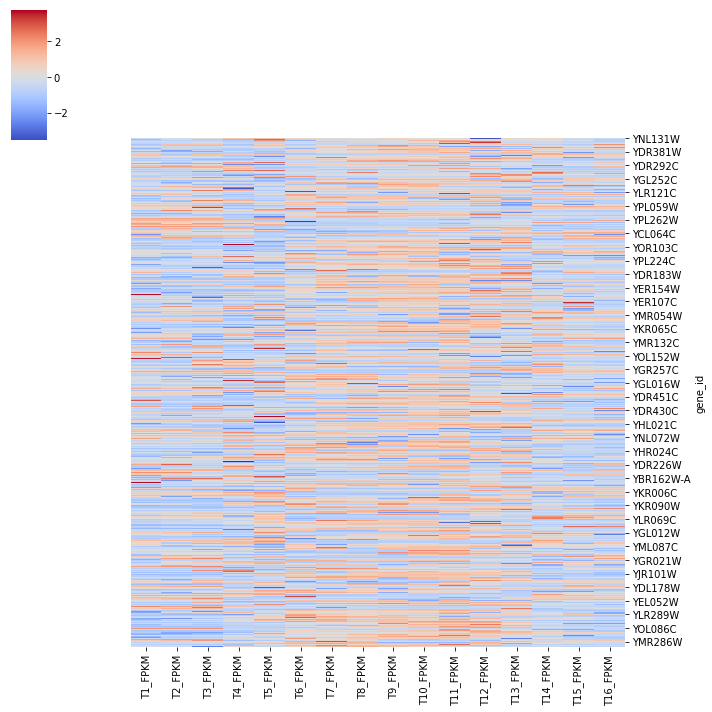

In [422]:
#Heatmap normalizado
RB_fpkm_ac=fpkm.loc[genesEtapa_ordenados].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
ax=sns.clustermap(RB_fpkm_ac, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, row_cluster=False
)


plt.savefig("RB_fpkm_ac.pdf")

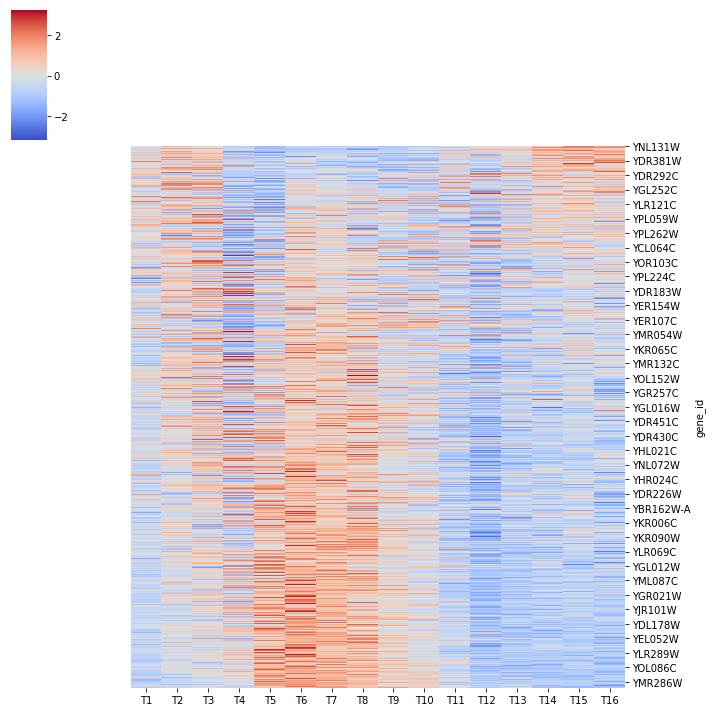

In [423]:
#Heatmap normalizado
RB_ACOA_H3K9ac=H3K9ac.loc[genesEtapa_ordenados].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
ax=sns.clustermap(RB_ACOA_H3K9ac, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, row_cluster=False
)


plt.savefig("RB_ACOA_H3K9ac.pdf")

LISTA ORDENADA DE GENES PARA H3K4ME3

In [424]:
#Input
marcaEpigenetica= H3K4me3
genesEtapa= lista_RC_ss
perfilPrecursor= SAM

#Cálculo de la correlacion entre el precursor y la marca
def coeficiente_correlacion(marcaEpigenetica,perfilPrecursor):

  #Calcula el coeficiente de correlación dados 
  #dos vectores a y b.

  #Esta función recibe "a" y "b" como listas

  #Crea los array a y b a partir de las listas
  #Esto, con el fin de hacer operaciones entre vectores
    array_a = np.array(marcaEpigenetica)
    array_b = np.array(perfilPrecursor)

  #calcula los promedios de los vectores a y b
    promedio_a = np.mean(marcaEpigenetica)
    promedio_b = np.mean(perfilPrecursor)

  #Calcula las distancias de cada dato puntual respecto a su media
    distancia_a = marcaEpigenetica-promedio_a*np.array([1]*len(marcaEpigenetica))
    distancia_b = perfilPrecursor-promedio_b*np.array([1]*len(perfilPrecursor))

  #Calcula el producto punto entre estas dos distancias
  #Que viene siendo el numerador de la ecuación de coeficientes de correlacion
    numerador = np.dot(distancia_a,distancia_b)

  #Calcula la norma de â y b̂
  #Construcción del denominador
    norma_a = np.linalg.norm(distancia_a)
    norma_b = np.linalg.norm(distancia_b)
    denominador = norma_a*norma_b

  #Calculo del coeficiente de correlación
    coef_corr = numerador/denominador
    return coef_corr

#Agregar vectores
    corr=[]
    for i in range(len(marcaEpigenetica)):
        corr.append(coeficiente_correlacion(np.array(marcaEpigenetica)[i],np.array(perfilPrecursor)[0]))
#ordenar corrlacion demayor a menor
    df_corr=pd.DataFrame(corr,index =marcaEpigenetica.index,columns = ['correlation'])
    corr_sort = df_corr.sort_values('correlation',ascending=False)

#print(corr_sort)

#Asociar estos genes con los de la lista RC,RB,OX
genesEtapa_=[] 
for i in corr_sort.index:
    genesEtapa_.append(i) #Genes ordenados de mayor a menor correlacion

genesEtapa_ordenados=[]       
for gene in genesEtapa_:
        if gene in genesEtapa: #vector de Kuang con genes en OX, RB, o RC relacionado con atacseq
            genesEtapa_ordenados.append(gene)

len(genesEtapa_ordenados)
#genesEtapa_ordenados

1211

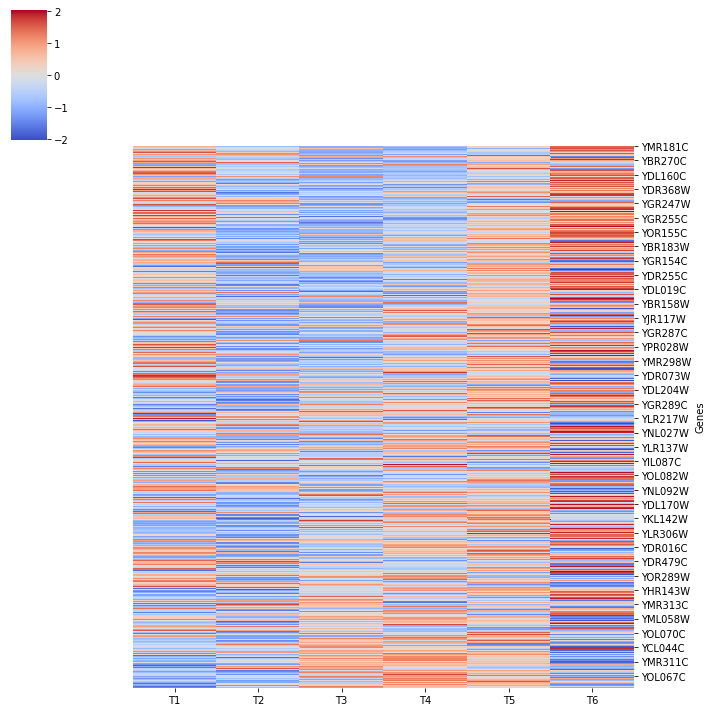

In [425]:
#Heatmap normalizado
RC_SAM_norm=df_atac.loc[genesEtapa_ordenados].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
ax=sns.clustermap(RC_SAM_norm, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, row_cluster=False
)


plt.savefig("RC_SAM_atac.pdf")

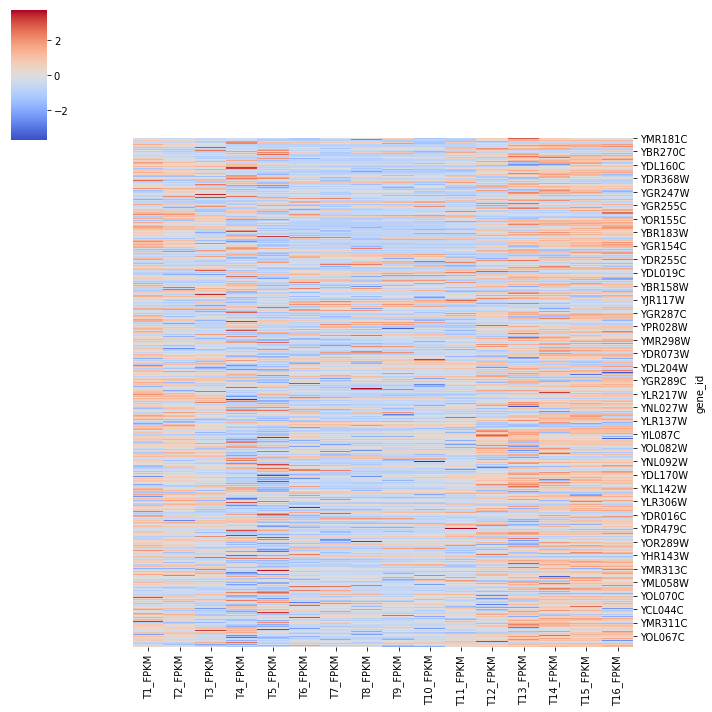

In [426]:
#Heatmap normalizado
RC_fpkm_me=fpkm.loc[genesEtapa_ordenados].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
ax=sns.clustermap(RC_fpkm_me, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, row_cluster=False
)


plt.savefig("RC_fpkm_me.pdf")

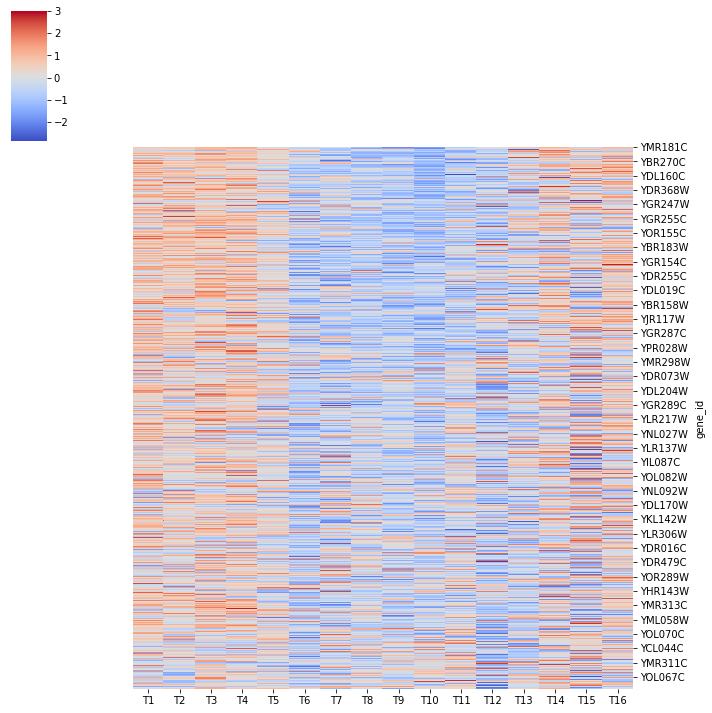

In [427]:
#Heatmap normalizado
RC_SAM_H3K4me3=H3K4me3.loc[genesEtapa_ordenados].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
ax=sns.clustermap(RC_SAM_H3K4me3, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, row_cluster=False
)


plt.savefig("RC_SAM_H3K4me3.pdf")

In [428]:
#Input
marcaEpigenetica= H3K4me3
genesEtapa= lista_OX_ss
perfilPrecursor= SAM

#Cálculo de la correlacion entre el precursor y la marca
def coeficiente_correlacion(marcaEpigenetica,perfilPrecursor):

  #Calcula el coeficiente de correlación dados 
  #dos vectores a y b.

  #Esta función recibe "a" y "b" como listas

  #Crea los array a y b a partir de las listas
  #Esto, con el fin de hacer operaciones entre vectores
    array_a = np.array(marcaEpigenetica)
    array_b = np.array(perfilPrecursor)

  #calcula los promedios de los vectores a y b
    promedio_a = np.mean(marcaEpigenetica)
    promedio_b = np.mean(perfilPrecursor)

  #Calcula las distancias de cada dato puntual respecto a su media
    distancia_a = marcaEpigenetica-promedio_a*np.array([1]*len(marcaEpigenetica))
    distancia_b = perfilPrecursor-promedio_b*np.array([1]*len(perfilPrecursor))

  #Calcula el producto punto entre estas dos distancias
  #Que viene siendo el numerador de la ecuación de coeficientes de correlacion
    numerador = np.dot(distancia_a,distancia_b)

  #Calcula la norma de â y b̂
  #Construcción del denominador
    norma_a = np.linalg.norm(distancia_a)
    norma_b = np.linalg.norm(distancia_b)
    denominador = norma_a*norma_b

  #Calculo del coeficiente de correlación
    coef_corr = numerador/denominador
    return coef_corr

#Agregar vectores
    corr=[]
    for i in range(len(marcaEpigenetica)):
        corr.append(coeficiente_correlacion(np.array(marcaEpigenetica)[i],np.array(perfilPrecursor)[0]))
#ordenar corrlacion demayor a menor
    df_corr=pd.DataFrame(corr,index =marcaEpigenetica.index,columns = ['correlation'])
    corr_sort = df_corr.sort_values('correlation',ascending=False)

#print(corr_sort)

#Asociar estos genes con los de la lista RC,RB,OX
genesEtapa_=[] 
for i in corr_sort.index:
    genesEtapa_.append(i) #Genes ordenados de mayor a menor correlacion

genesEtapa_ordenados=[]       
for gene in genesEtapa_:
        if gene in genesEtapa: #vector de Kuang con genes en OX, RB, o RC relacionado con atacseq
            genesEtapa_ordenados.append(gene)

len(genesEtapa_ordenados)
#genesEtapa_ordenados

1404

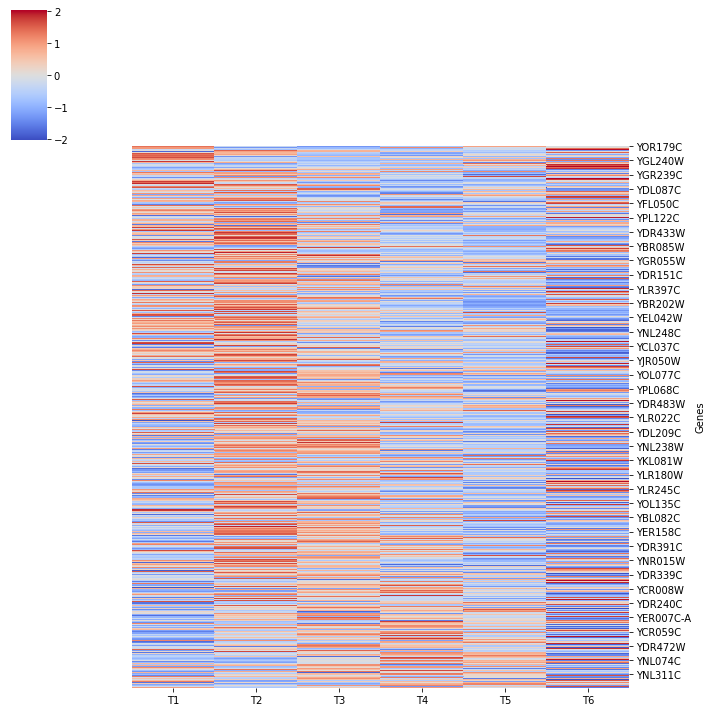

In [429]:
#Heatmap normalizado
OX_SAM_norm=df_atac.loc[genesEtapa_ordenados].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
ax=sns.clustermap(OX_SAM_norm, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, row_cluster=False
)


plt.savefig("OX_SAM_atac.pdf")

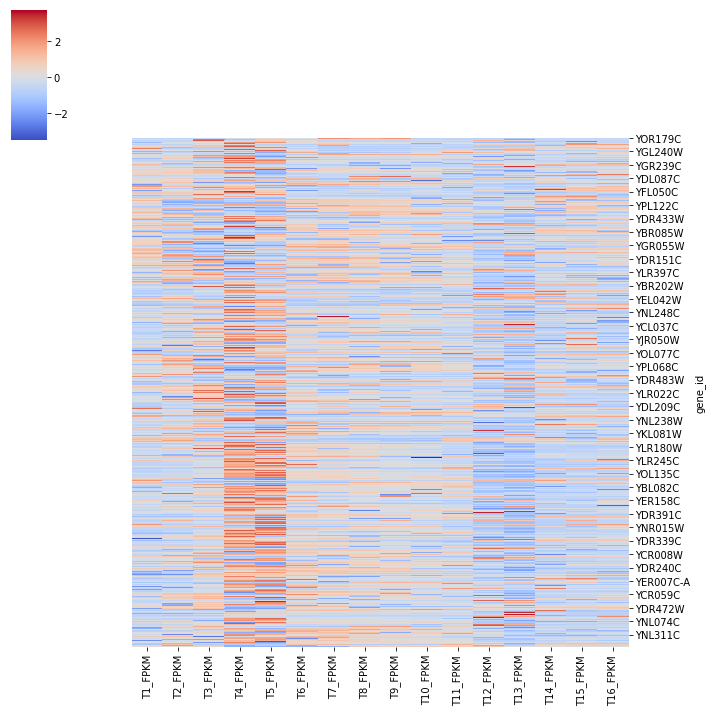

In [430]:
#Heatmap normalizado
OX_fpkm_me=fpkm.loc[genesEtapa_ordenados].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
ax=sns.clustermap(OX_fpkm_me, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, row_cluster=False
)


plt.savefig("OX_fpkm_me.pdf")

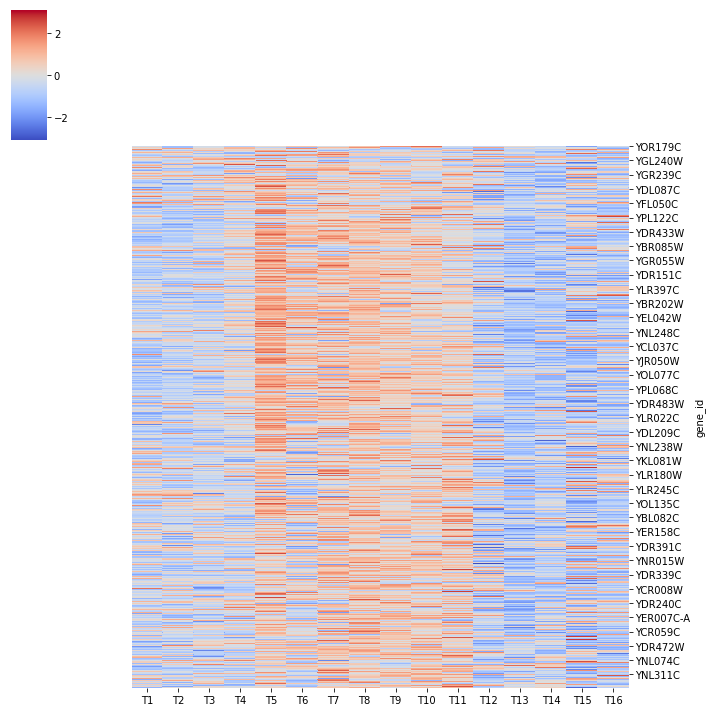

In [431]:
#Heatmap normalizado
OX_SAM_H3K4me3=H3K4me3.loc[genesEtapa_ordenados].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
ax=sns.clustermap(OX_SAM_H3K4me3, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, row_cluster=False
)


plt.savefig("OX_SAM_H3K4me3.pdf")

In [432]:
#Input
marcaEpigenetica= H3K4me3
genesEtapa= lista_RB_ss
perfilPrecursor= SAM

#Cálculo de la correlacion entre el precursor y la marca
def coeficiente_correlacion(marcaEpigenetica,perfilPrecursor):

  #Calcula el coeficiente de correlación dados 
  #dos vectores a y b.

  #Esta función recibe "a" y "b" como listas

  #Crea los array a y b a partir de las listas
  #Esto, con el fin de hacer operaciones entre vectores
    array_a = np.array(marcaEpigenetica)
    array_b = np.array(perfilPrecursor)

  #calcula los promedios de los vectores a y b
    promedio_a = np.mean(marcaEpigenetica)
    promedio_b = np.mean(perfilPrecursor)

  #Calcula las distancias de cada dato puntual respecto a su media
    distancia_a = marcaEpigenetica-promedio_a*np.array([1]*len(marcaEpigenetica))
    distancia_b = perfilPrecursor-promedio_b*np.array([1]*len(perfilPrecursor))

  #Calcula el producto punto entre estas dos distancias
  #Que viene siendo el numerador de la ecuación de coeficientes de correlacion
    numerador = np.dot(distancia_a,distancia_b)

  #Calcula la norma de â y b̂
  #Construcción del denominador
    norma_a = np.linalg.norm(distancia_a)
    norma_b = np.linalg.norm(distancia_b)
    denominador = norma_a*norma_b

  #Calculo del coeficiente de correlación
    coef_corr = numerador/denominador
    return coef_corr

#Agregar vectores
    corr=[]
    for i in range(len(marcaEpigenetica)):
        corr.append(coeficiente_correlacion(np.array(marcaEpigenetica)[i],np.array(perfilPrecursor)[0]))
#ordenar corrlacion demayor a menor
    df_corr=pd.DataFrame(corr,index =marcaEpigenetica.index,columns = ['correlation'])
    corr_sort = df_corr.sort_values('correlation',ascending=False)

#print(corr_sort)

#Asociar estos genes con los de la lista RC,RB,OX
genesEtapa_=[] 
for i in corr_sort.index:
    genesEtapa_.append(i) #Genes ordenados de mayor a menor correlacion

genesEtapa_ordenados=[]       
for gene in genesEtapa_:
        if gene in genesEtapa: #vector de Kuang con genes en OX, RB, o RC relacionado con atacseq
            genesEtapa_ordenados.append(gene)

len(genesEtapa_ordenados)
#genesEtapa_ordenados

861

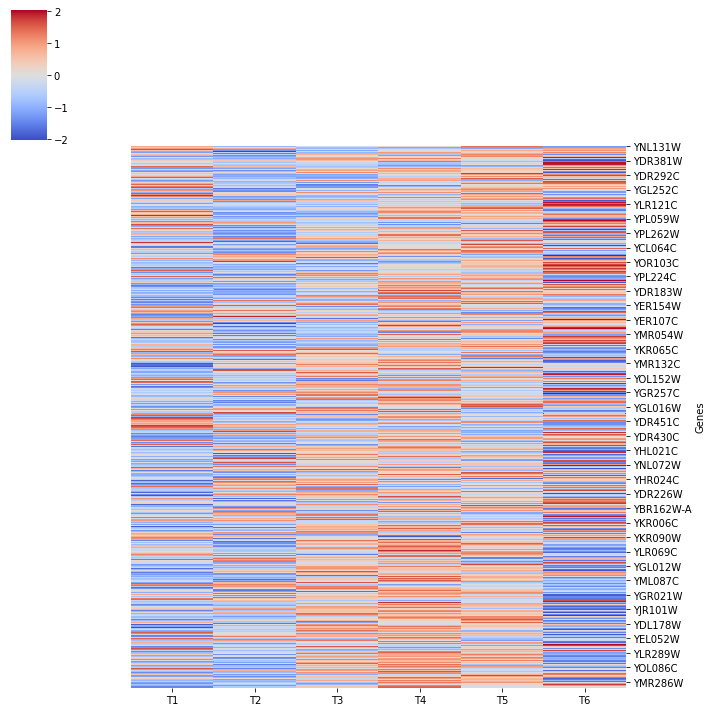

In [433]:
#Heatmap normalizado
RB_SAM_norm=df_atac.loc[genesEtapa_ordenados].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
ax=sns.clustermap(RB_SAM_norm, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, row_cluster=False
)


plt.savefig("RB_SAM_atac.pdf")

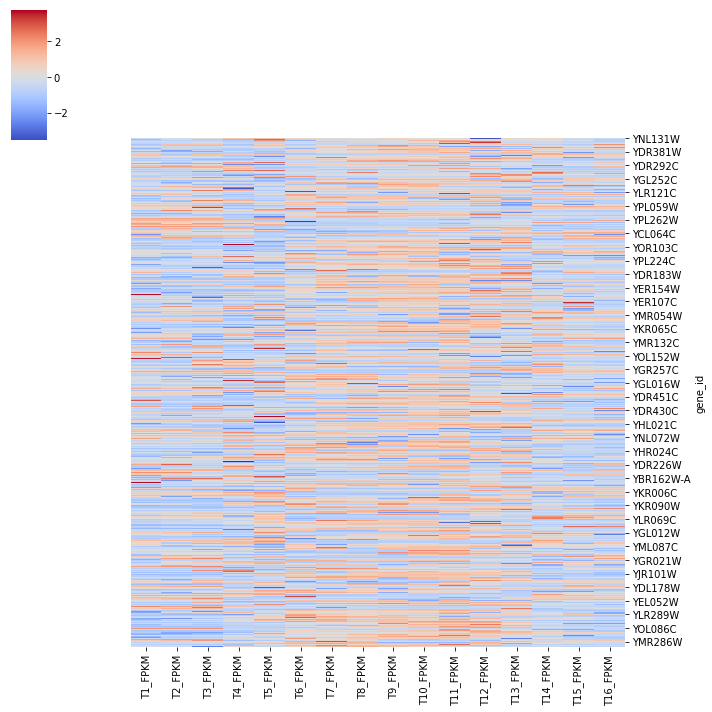

In [434]:
#Heatmap normalizado
RB_fpkm_me=fpkm.loc[genesEtapa_ordenados].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
ax=sns.clustermap(RB_fpkm_me, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, row_cluster=False
)


plt.savefig("RB_fpkm_me.pdf")

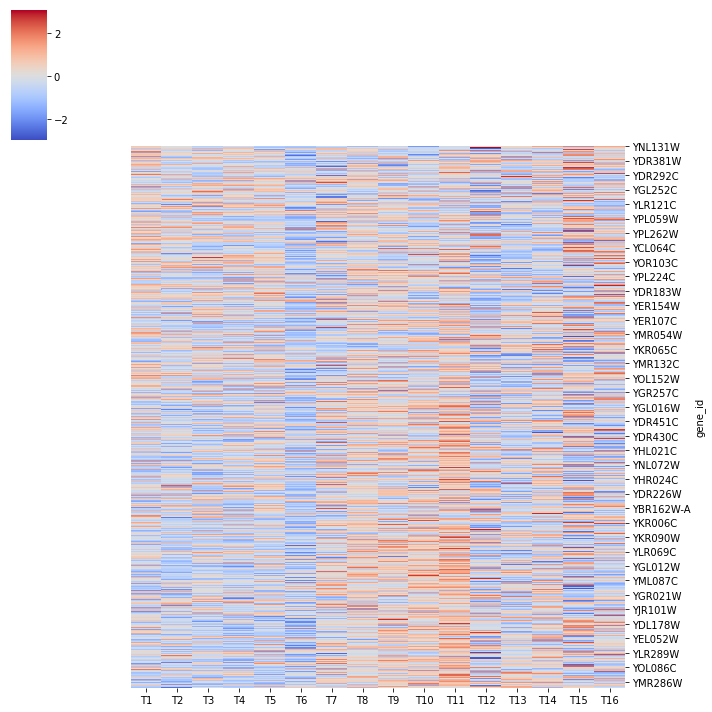

In [435]:
#Heatmap normalizado
RB_SAM_H3K4me3=H3K4me3.loc[genesEtapa_ordenados].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
ax=sns.clustermap(RB_SAM_H3K4me3, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, row_cluster=False
)


plt.savefig("RB_SAM_H3K4me3.pdf")